In [1]:
import pandas as pd
from dataframe_observer import DataframeObserver as DO
from feature_handling import FeatureHandling as FH

df = pd.read_csv('titanic.csv')

X = df.drop(['PassengerId','Name','Ticket','Cabin','Survived'],axis=1)
y = df['Survived']
DO.read_df_info(X)

------------------
846 rows, 7 columns.
------------------
            Dtype  Count  unique   unique%  missing  missing%
Pclass      int64    846       3  0.003546        0  0.000000
Sex        object    846       2  0.002364        0  0.000000
Age       float64    676      86  0.101655      170  0.200946
SibSp       int64    846       7  0.008274        0  0.000000
Parch       int64    846       7  0.008274        0  0.000000
Fare      float64    846     243  0.287234        0  0.000000
Embarked   object    844       3  0.003546        2  0.002364
------------------


In [4]:
fh = FH(X)
fh.auto_imputers()
X_end = fh.general_encoder(['Age','Fare'],None,['Pclass','Sex','SibSp','Parch','Embarked'])
X_end.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.410532,-0.504428,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.421704,0.293167,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.715905,-0.385339,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.410532,9.608697,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.039988,-0.435376,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_end,y)
y_pred = rf.predict_proba(X_end)

In [19]:
y_pred = list(y_pred[:,1])
y_pred[:20]

[0.0,
 0.02,
 0.05166666666666666,
 0.69,
 0.07166666666666667,
 0.17,
 0.96,
 0.3925,
 0.015,
 0.68,
 0.69,
 0.0,
 0.01,
 0.02,
 0.08,
 0.0,
 0.14857973970473964,
 0.1,
 0.5250833333333332,
 0.68]

In [20]:
y_true = y
y_true[:20]

0     0
1     0
2     0
3     1
4     0
5     0
6     1
7     0
8     0
9     1
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    1
19    1
Name: Survived, dtype: int64

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [4]:

from sklearn.metrics import matthews_corrcoef
y_true = [+1, +1, +1, 0]
y_pred = [+1, 0, +1, +1]
matthews_corrcoef(y_true, y_pred)

-0.3333333333333333

In [1]:
import pandas as pd
df = pd.read_csv('data_scored.csv')
y_true  = df['Survived']
y_score = df['proba_1']


In [4]:
from evaluation import BinClsEvaluation
be = BinClsEvaluation(y_score,y_true)

/Users/FY/opt/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/FY/opt/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


cutoff: 0.5
tn: 412
fp: 115
fn: 57
tp: 262
gain_tn: 0
gain_tp: 262
gain_fn: 0
gain_fp: -34.5
gain_all: 227.5
gain_per_record: 0.26891252955082745


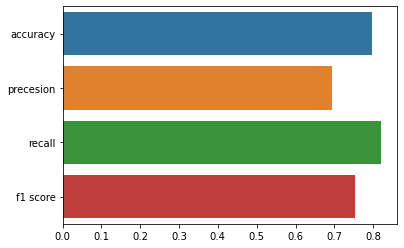

In [3]:
be.confusion_matrix()

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.metrics import log_loss, roc_auc_score, brier_score_loss, precision_score, recall_score, f1_score, \
    accuracy_score, hamming_loss, matthews_corrcoef, confusion_matrix, precision_recall_curve
df = pd.read_csv('data_scored.csv')

y_true  = df['Survived']
y_score = df['proba_1']

y_score

0      0.083726
1      0.249282
2      0.223693
3      0.000000
4      0.223693
         ...   
841    0.083726
842    0.744892
843    0.491349
844    0.744892
845    0.223693
Name: proba_1, Length: 846, dtype: float64

In [4]:
# cutoff = []
# accuracy = []
# precision =[]
# recall = []
# f1= []
#
# for value in range(0,102,2):
#     #print(value/100)
#     cutoff.append(value/100)
#     accuracy.append(accuracy_score(y_true, y_score > value/100))
#     precision.append(precision_score(y_true, y_score > value/100))
#     recall.append(recall_score(y_true, y_score >value/100))
#     f1.append(f1_score(y_true, y_score > value/100))
#
# A = pd.DataFrame([cutoff,accuracy,precision,recall,f1]).T
# A.columns = ['cutoff','accuracy','precision','recall','f1']
# A

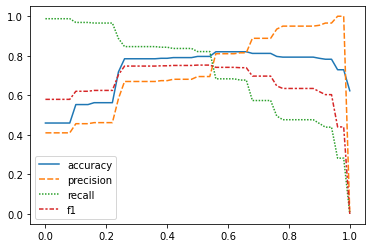

In [5]:
from evaluation import BinClsEvaluation
bce = BinClsEvaluation(y_score,y_true)
bce.decision_chart()

cutoff: 0.5
tn: 412
fp: 115
fn: 57
tp: 262
gain_tn: 0
gain_tp: 262
gain_fn: 0
gain_fp: -34.5
gain_all: 227.5
gain_per_record: 0.26891252955082745


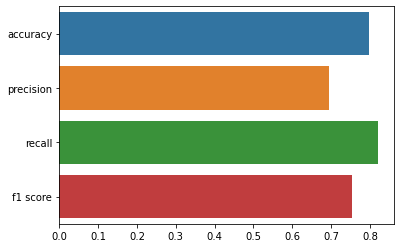

In [6]:
bce.confusion_matrix()

In [7]:
bce.detailed_metrics()


auc_roc: 0.8779213981072256
log_loss: 0.5599272698412924
brier_score_loss: 0.1337310564807838
accuracy: 0.7966903073286052
precision: 0.6949602122015915
recall: 0.8213166144200627
f1_score: 0.7528735632183907
hamming_loss: 0.2033096926713948
matthews_corrcoef: 0.5880755102018405


No Skill: ROC AUC=0.500
Model: ROC AUC=0.878


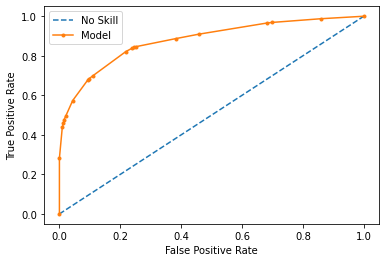

In [8]:
bce.roc_curve()

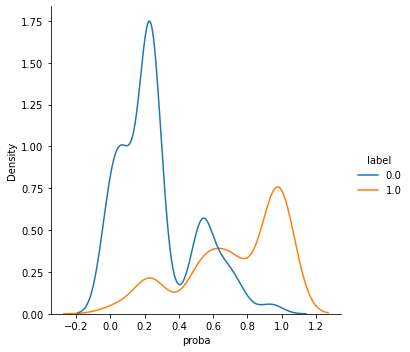

In [9]:

bce.density_chart()

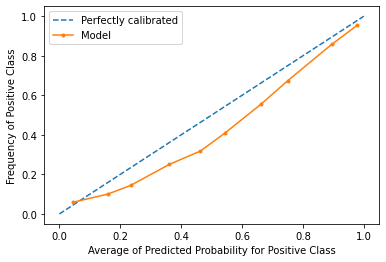

In [10]:

bce.calibration_curve()


In [1]:
import pandas as pd
df = pd.read_csv('train_scored.csv')
y_true = df['SalePrice']
y_score = df['prediction']

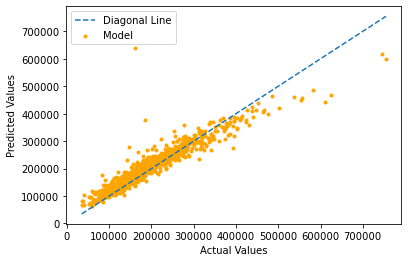

In [2]:
from evaluation import RegEvaluation as RE
re = RE(y_score,y_true)
re.scatter_plot()

In [3]:
re.detailed_metrics()

Explained_Variance_Score: 0.8946855156400026
Mean_Absolute_Error: 19251.67819910134
Mean_Absolute_Percentage_Error: 0.12401356526219344
Mean_Squared_Error: 807876280.946852
Root_Mean_Squared_Error: 28423.164513242573
Pearson_Coefficient: 0.948517991093002
R2_Score: 0.8719037002725044


min_raw: -169616.0389111258
max_raw: 478324.4490238704
min_clipped: -43054.056605419355
max_clipped: 50393.366339234
q25: 3878.833296590863
q75: 22034.310720037858
median: 13271.44309414296
avg: 12340.149505028325
std: 15486.754103123605


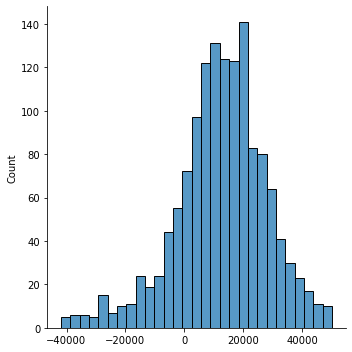

In [4]:
re.error_distribution()
